In [26]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('flights')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from datetime import datetime


Xd = df
Xd['my'] = pd.to_datetime(Xd['month'].astype(str) + ' ' + Xd['year'].astype(str))
Xd.head()

,year,month,passengers,my
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [55]:

X,y = Xd['my'], Xd['passengers']
X.reset_index()
X

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: my, Length: 144, dtype: datetime64[ns]

In [56]:
m = PolynomialFeatures(degree=3)
m.fit_transform(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=['1949-01-01T00:00:00.000000000' '1949-02-01T00:00:00.000000000'
 '1949-03-01T00:00:00.000000000' '1949-04-01T00:00:00.000000000'
 '1949-05-01T00:00:00.000000000' '1949-06-01T00:00:00.000000000'
 '1949-07-01T00:00:00.000000000' '1949-08-01T00:00:00.000000000'
 '1949-09-01T00:00:00.000000000' '1949-10-01T00:00:00.000000000'
 '1949-11-01T00:00:00.000000000' '1949-12-01T00:00:00.000000000'
 '1950-01-01T00:00:00.000000000' '1950-02-01T00:00:00.000000000'
 '1950-03-01T00:00:00.000000000' '1950-04-01T00:00:00.000000000'
 '1950-05-01T00:00:00.000000000' '1950-06-01T00:00:00.000000000'
 '1950-07-01T00:00:00.000000000' '1950-08-01T00:00:00.000000000'
 '1950-09-01T00:00:00.000000000' '1950-10-01T00:00:00.000000000'
 '1950-11-01T00:00:00.000000000' '1950-12-01T00:00:00.000000000'
 '1951-01-01T00:00:00.000000000' '1951-02-01T00:00:00.000000000'
 '1951-03-01T00:00:00.000000000' '1951-04-01T00:00:00.000000000'
 '1951-05-01T00:00:00.000000000' '1951-06-01T00:00:00.000000000'
 '1951-07-01T00:00:00.000000000' '1951-08-01T00:00:00.000000000'
 '1951-09-01T00:00:00.000000000' '1951-10-01T00:00:00.000000000'
 '1951-11-01T00:00:00.000000000' '1951-12-01T00:00:00.000000000'
 '1952-01-01T00:00:00.000000000' '1952-02-01T00:00:00.000000000'
 '1952-03-01T00:00:00.000000000' '1952-04-01T00:00:00.000000000'
 '1952-05-01T00:00:00.000000000' '1952-06-01T00:00:00.000000000'
 '1952-07-01T00:00:00.000000000' '1952-08-01T00:00:00.000000000'
 '1952-09-01T00:00:00.000000000' '1952-10-01T00:00:00.000000000'
 '1952-11-01T00:00:00.000000000' '1952-12-01T00:00:00.000000000'
 '1953-01-01T00:00:00.000000000' '1953-02-01T00:00:00.000000000'
 '1953-03-01T00:00:00.000000000' '1953-04-01T00:00:00.000000000'
 '1953-05-01T00:00:00.000000000' '1953-06-01T00:00:00.000000000'
 '1953-07-01T00:00:00.000000000' '1953-08-01T00:00:00.000000000'
 '1953-09-01T00:00:00.000000000' '1953-10-01T00:00:00.000000000'
 '1953-11-01T00:00:00.000000000' '1953-12-01T00:00:00.000000000'
 '1954-01-01T00:00:00.000000000' '1954-02-01T00:00:00.000000000'
 '1954-03-01T00:00:00.000000000' '1954-04-01T00:00:00.000000000'
 '1954-05-01T00:00:00.000000000' '1954-06-01T00:00:00.000000000'
 '1954-07-01T00:00:00.000000000' '1954-08-01T00:00:00.000000000'
 '1954-09-01T00:00:00.000000000' '1954-10-01T00:00:00.000000000'
 '1954-11-01T00:00:00.000000000' '1954-12-01T00:00:00.000000000'
 '1955-01-01T00:00:00.000000000' '1955-02-01T00:00:00.000000000'
 '1955-03-01T00:00:00.000000000' '1955-04-01T00:00:00.000000000'
 '1955-05-01T00:00:00.000000000' '1955-06-01T00:00:00.000000000'
 '1955-07-01T00:00:00.000000000' '1955-08-01T00:00:00.000000000'
 '1955-09-01T00:00:00.000000000' '1955-10-01T00:00:00.000000000'
 '1955-11-01T00:00:00.000000000' '1955-12-01T00:00:00.000000000'
 '1956-01-01T00:00:00.000000000' '1956-02-01T00:00:00.000000000'
 '1956-03-01T00:00:00.000000000' '1956-04-01T00:00:00.000000000'
 '1956-05-01T00:00:00.000000000' '1956-06-01T00:00:00.000000000'
 '1956-07-01T00:00:00.000000000' '1956-08-01T00:00:00.000000000'
 '1956-09-01T00:00:00.000000000' '1956-10-01T00:00:00.000000000'
 '1956-11-01T00:00:00.000000000' '1956-12-01T00:00:00.000000000'
 '1957-01-01T00:00:00.000000000' '1957-02-01T00:00:00.000000000'
 '1957-03-01T00:00:00.000000000' '1957-04-01T00:00:00.000000000'
 '1957-05-01T00:00:00.000000000' '1957-06-01T00:00:00.000000000'
 '1957-07-01T00:00:00.000000000' '1957-08-01T00:00:00.000000000'
 '1957-09-01T00:00:00.000000000' '1957-10-01T00:00:00.000000000'
 '1957-11-01T00:00:00.000000000' '1957-12-01T00:00:00.000000000'
 '1958-01-01T00:00:00.000000000' '1958-02-01T00:00:00.000000000'
 '1958-03-01T00:00:00.000000000' '1958-04-01T00:00:00.000000000'
 '1958-05-01T00:00:00.000000000' '1958-06-01T00:00:00.000000000'
 '1958-07-01T00:00:00.000000000' '1958-08-01T00:00:00.000000000'
 '1958-09-01T00:00:00.000000000' '1958-10-01T00:00:00.000000000'
 '1958-11-01T00:00:00.000000000' '1958-12-01T00:00:00.000000000'
 '1959-01-01T00:00:00.000000000' '1959-02-01T00:00:00.000000000'
 '1959-03-01T00:00:00.000000000' '1959-04-01T00:00:00.000000000'
 '1959-05-01T00:00:00.000000000' '1959-06-01T00:00:00.000000000'
 '1959-07-01T00:00:00.000000000' '1959-08-01T00:00:00.000000000'
 '1959-09-01T00:00:00.000000000' '1959-10-01T00:00:00.000000000'
 '1959-11-01T00:00:00.000000000' '1959-12-01T00:00:00.000000000'
 '1960-01-01T00:00:00.000000000' '1960-02-01T00:00:00.000000000'
 '1960-03-01T00:00:00.000000000' '1960-04-01T00:00:00.000000000'
 '1960-05-01T00:00:00.000000000' '1960-06-01T00:00:00.000000000'
 '1960-07-01T00:00:00.000000000' '1960-08-01T00:00:00.000000000'
 '1960-09-01T00:00:00.000000000' '1960-10-01T00:00:00.000000000'
 '1960-11-01T00:00:00.000000000' '1960-12-01T00:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
X = pd.DataFrame({
      'a':[1.0, 2.0, 3.0],
      'b':[1.0, 2.0, 0.0]})
m = PolynomialFeatures(interaction_only=True)
m.fit_transform(X)

array([[1., 1., 1., 1.],
       [1., 2., 2., 4.],
       [1., 3., 0., 0.]])

In [9]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# создаем синтетический набор данных для задачи регрессии
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
# разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# создаем объект модели ElasticNet и задаем параметры alpha и l1_ratio
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
# обучаем модель на обучающей выборке
enet.fit(X_train, y_train)
# делаем предсказания на тестовой выборке
y_pred = enet.predict(X_test)
# оцениваем качество модели на тестовой выборке
score = enet.score(X_test, y_test)
print(f"ElasticNet R^2 score: {score:.2f}")


ElasticNet R^2 score: 1.00


In [1]:
df.columns

NameError: name 'df' is not defined

<AxesSubplot: >

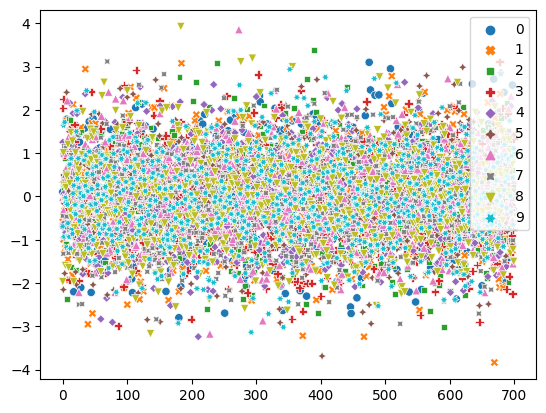

In [18]:

from sklearn.model_selection import cross_validate
X, y = 
model = LinearRegression()
cv = cross_validate(model, X_train_trans, y_train,
                    cv=5,
                    scoring='r2',
                    return_train_score=True
)
# convert the dictionary of lists into a DataFrame
cv = pd.DataFrame(cv)
print(cv)

